<a href="https://colab.research.google.com/github/Gaukhar-ai/Capstone/blob/master/Copy_of_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install alpaca-trade-api --quiet
!pip install pandas-ta --quiet
!pip install -U git+https://github.com/twopirllc/pandas-ta

'!pip install alpaca-trade-api --quiet\n!pip install pandas-ta --quiet\n!pip install -U git+https://github.com/twopirllc/pandas-ta'

In [ ]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

'!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz\n!tar -xzvf ta-lib-0.4.0-src.tar.gz\n%cd ta-lib\n!./configure --prefix=/usr\n!make\n!make install\n!pip install Ta-Lib\nimport talib'

In [67]:
import alpaca_trade_api as tradeapi
import pandas as pd
import pandas_ta as ta
from pandas_datareader import data
import matplotlib.pyplot as plt
import time
import datetime
import threading
from pandas_ta.utils import get_drift, get_offset, verify_series
import talib

import numpy as np
import pandas as pd
from sklearn.preprocessing import scale
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
%matplotlib inline
from sklearn.mixture import GaussianMixture
#run kmeans and gaussian and interpret, keep how many clusters i need and change
import scipy
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA
from scipy.special import entr
import plotly.express as px
from sklearn import preprocessing
from sklearn import metrics 
from scipy.spatial.distance import cdist
from mpl_toolkits.mplot3d import Axes3D
robust_scaler = RobustScaler()
#X_train_robust = robust_scaler.fit_transform(df)

api = tradeapi.REST(key_id='PKR04JNMA7MP4CN8FW43', 
                    secret_key='6AzADTDNW3jEBb1xqxq5yuhJvJfDJeUpctv686sr', 
                    base_url='https://paper-api.alpaca.markets')

In [68]:
# define timezome and time period
NY = 'America/New_York'
start=pd.Timestamp('2020-01-01', tz=NY).isoformat()
end=pd.Timestamp('2020-10-30', tz=NY).isoformat()

In [69]:
#stockUniverse = [
df = api.get_barset([
#stocks traded by me and skyrocketing ones.                  
'GE', 'F', 'AMZN', 'TSLA', 'AAPL', 'SNAP', 'GM', 'SHOP', 'TWTR', 'AMD', 'NVDA', 'FB',
#OIL COMPANIES:
'AXAS', 'BRY',  'CDEV', 'DWSN', 'FANG', 'DMLP', 'FLMN', 'GPOR', 'LLEX', 'LONE', 'BP',
'MARPS', 'MCEP', 'NEXT', 'PTEN', 'PDCE', 'PVAC', 'RGCO', 'ROSE', 'SAEX', 'SNDE', 'TELL', 'TRCH', 'TGA', 'USEG', 'VNOM',
#PRECIOUS METALS:
'USAU', 'GOLD', 'CHNR', 'MPVD', 'OPNT', 'PAAS', 'RGLD', 'SSRM', 'WWR', 
#AIRPLANE STOCKS:
'ALGT', 'AAL', 'MESA', 'RYAAY', 'SKYW', 'SAVE', 'UAL', 'BA'
#MARINE TRANSPORTATION:
'CPLP', 'CTRM', 'EGLE', 'EDRY', 'ESEA', 'GLBS', 'GLNG', 'GOGL', 'GRIN', 'MBUU', 'MCFT', 'NMCI', 'NCLH', 'OMEX', 'PANL', 'DCIX', 'PXS', 
'SHIP', 'SBLK', 'GASS', 'TOPS', 'TRMD'
#AUTO MANUFACTURE:
'APOG', 'CAAS', 'CVGI', 'DORM', 'GNTX', 'THRM', 'IEP', 'MPAA', 'SORL', 'STRT', 'VC',
#CONFERENCING PLATFORMS: 
'ZM', 'CSCO', 'LOGM', 'MSFT', 'GOOGL', 'RNG', 
#BIOTECH STOCKS WORKING ON COVID:
'AMGN', 'ADPT', 'ALT', 'PFE', 'BNTX', 'CYDY', 'GILD', 'GSK', 'HTBX', 'INO', 'JNJ', 'TAK', 'CSLLY', 'TBIO', 'ROG', 'SNY', 'REGN', 
'NVAX', 'MRNA'],
'day', start=start, end=end).df

In [ ]:
'''stock_list= [
#stocks traded by me and skyrocketing ones.                  
'GE', 'F', 'AMZN', 'TSLA', 'AAPL', 'SNAP', 'GM', 'SHOP', 'TWTR', 'AMD', 'NVDA', 'FB',
#OIL COMPANIES:
'AXAS', 'BRY', 'CDEV', 'DWSN', 'FANG', 'DMLP', 'FLMN', 'GPOR', 'LLEX', 'LONE', 'BP',
'MARPS', 'MCEP', 'NEXT', 'PTEN', 'PDCE', 'PVAC', 'RGCO', 'ROSE', 'SAEX', 'SNDE', 'TELL', 'TRCH', 'TGA', 'USEG', 'VNOM',
#PRECIOUS METALS:
'USAU', 'GOLD', 'CHNR', 'MPVD', 'OPNT', 'PAAS', 'RGLD', 'SSRM', 'WWR', 
#AIRPLANE STOCKS:
'ALGT', 'AAL', 'HA', 'JBLU', 'MESA', 'RYAAY', 'SKYW', 'SAVE', 'UAL', 'BA'
#MARINE TRANSPORTATION:
'CPLP', 'CTRM', 'EGLE', 'EDRY', 'ESEA', 'GLBS', 'GLNG', 'GOGL', 'GRIN', 'MBUU', 'MCFT', 'NMCI', 'NCLH', 'OMEX', 'PANL', 'DCIX', 'PXS', 
'SHIP', 'SBLK', 'GASS', 'TOPS', 'TRMD'
#AUTO MANUFACTURE:
'APOG', 'CAAS', 'CVGI', 'DORM', 'GNTX', 'THRM', 'IEP', 'MPAA', 'SORL', 'STRT', 'VC',
#CONFERENCING PLATFORMS: 
'ZM', 'CSCO', 'LOGM', 'MSFT', 'GOOGL', 'RNG', 
#BIOTECH STOCKS WORKING ON COVID:
'AMGN', 'ADPT', 'ALT', 'PFE', 'BNTX', 'CYDY', 'GILD', 'GSK', 'HTBX', 'INO', 'JNJ', 'TAK', 'CSLLY', 'TBIO', 'ROG', 'SNY', 'REGN', 
'NVAX', 'MRNA']'''

"stock_list= [\n#stocks traded by me and skyrocketing ones.                  \n'GE', 'F', 'AMZN', 'TSLA', 'AAPL', 'SNAP', 'GM', 'SHOP', 'TWTR', 'AMD', 'NVDA', 'FB',\n#OIL COMPANIES:\n'AXAS', 'BRY', 'CDEV', 'DWSN', 'FANG', 'DMLP', 'FLMN', 'GPOR', 'LLEX', 'LONE', 'BP',\n'MARPS', 'MCEP', 'NEXT', 'PTEN', 'PDCE', 'PVAC', 'RGCO', 'ROSE', 'SAEX', 'SNDE', 'TELL', 'TRCH', 'TGA', 'USEG', 'VNOM',\n#PRECIOUS METALS:\n'USAU', 'GOLD', 'CHNR', 'MPVD', 'OPNT', 'PAAS', 'RGLD', 'SSRM', 'WWR', \n#AIRPLANE STOCKS:\n'ALGT', 'AAL', 'HA', 'JBLU', 'MESA', 'RYAAY', 'SKYW', 'SAVE', 'UAL', 'BA'\n#MARINE TRANSPORTATION:\n'CPLP', 'CTRM', 'EGLE', 'EDRY', 'ESEA', 'GLBS', 'GLNG', 'GOGL', 'GRIN', 'MBUU', 'MCFT', 'NMCI', 'NCLH', 'OMEX', 'PANL', 'DCIX', 'PXS', \n'SHIP', 'SBLK', 'GASS', 'TOPS', 'TRMD'\n#AUTO MANUFACTURE:\n'APOG', 'CAAS', 'CVGI', 'DORM', 'GNTX', 'THRM', 'IEP', 'MPAA', 'SORL', 'STRT', 'VC',\n#CONFERENCING PLATFORMS: \n'ZM', 'CSCO', 'LOGM', 'MSFT', 'GOOGL', 'RNG', \n#BIOTECH STOCKS WORKING ON COVID:\n'AMGN'

In [ ]:
#len(stock_list)

In [70]:
stock_list = [
#stocks traded by me and skyrocketing ones.                  
'GE', 'F', 'AMZN', 'TSLA', 'AAPL', 'SNAP', 'GM', 'SHOP', 'TWTR', 'AMD', 'NVDA', 'FB',
#OIL COMPANIES:
'AXAS', 'BRY', 'CDEV', 'DWSN', 'FANG', 'DMLP', 'FLMN', 'GPOR', 'LLEX', 'LONE', 'BP',
'MARPS', 'MCEP', 'NEXT', 'PTEN', 'PDCE', 'PVAC', 'RGCO', 'ROSE', 'SAEX', 'SNDE', 'TELL', 'TRCH', 'TGA', 'USEG', 'VNOM',
#PRECIOUS METALS:
'USAU', 'GOLD', 'CHNR', 'MPVD', 'OPNT', 'PAAS', 'RGLD', 'SSRM', 'WWR', 
#AIRPLANE STOCKS:
'ALGT', 'AAL', 'MESA', 'RYAAY', 'SKYW', 'SAVE', 'UAL', 'BA'
#MARINE TRANSPORTATION:
'CPLP', 'CTRM', 'EGLE', 'EDRY', 'ESEA', 'GLBS', 'GLNG', 'GOGL', 'GRIN', 'MBUU', 'MCFT', 'NMCI', 'NCLH', 'OMEX', 'PANL', 'DCIX', 'PXS', 
'SHIP', 'SBLK', 'GASS', 'TOPS', 'TRMD'
#AUTO MANUFACTURE:
'APOG', 'CAAS', 'CVGI', 'DORM', 'GNTX', 'THRM', 'IEP', 'MPAA', 'SORL', 'STRT', 'VC',
#CONFERENCING PLATFORMS: 
'ZM', 'CSCO', 'LOGM', 'MSFT', 'GOOGL', 'RNG', 
#BIOTECH STOCKS WORKING ON COVID:
'AMGN', 'ADPT', 'ALT', 'PFE', 'BNTX', 'CYDY', 'GILD', 'GSK', 'HTBX', 'INO', 'JNJ', 'TAK', 'CSLLY', 'TBIO', 'ROG', 'SNY', 'REGN', 
'NVAX', 'MRNA']

In [ ]:
import numpy as np
from talib.abstract import *

In [ ]:
inputs = {
    'open': np.random.random(422),
    'high': np.random.random(422),
    'low': np.random.random(422),
    'close': np.random.random(422),
    'volume': np.random.random(422)
}

In [71]:
#get the metrics to cluster stocks based on them and predict the price move eventually

for i in range (0, 50):
  stock = stock_list[i]
  print(i)
  print(len(df[stock]))
  stock_df = df[stock]
  stock_df['symbol'] = stock

#relative strength index - a momentum indicator that measures the 
#magnitude of recent price changes in order to evaluate overbought or 
#oversold conditions in the price of a stock or other asset.
  stock_df['rsi'] = 0
  rsi=talib.RSI(np.array(stock_df.close.values,dtype=float),14) 
  stock_df['rsi'] = rsi


#simple moving average - each value in the time period carries equal weight, 
#and values outside of the time period are not included in the average.
  stock_df['sma'] = 0
  sma = talib.SMA(np.array(stock_df.close.values,dtype=float),14)
  stock_df['sma'] = sma

  #exponential moving average - is a cumulative calculation, including all data.
  stock_df['ema'] = 0
  ema = talib.EMA(np.array(stock_df.close.values,dtype=float),14)
  stock_df['ema'] = ema

  stock_df['midpoint'] = 0
  midpoint = talib.MIDPOINT(np.array(stock_df.close.values,dtype=float),14)
  stock_df['midpoint'] = midpoint

  #coomodity channel index -  to determine overbought and oversold levels.
  stock_df['cci'] = 0
  cci = talib.CCI(np.array(stock_df.high.values, dtype=float), np.array(stock_df.low.values, dtype=float), np.array(stock_df.close.values, dtype=float),14)
  stock_df['cci'] = cci

  #On-balance volume, intended to relate price and volume in the stock market. OBV is based on a cumulative total volume
  stock_df['obv'] = 0
  obv = talib.OBV(np.array(stock_df.close.values, dtype=float), np.array(stock_df.volume.values, dtype=float))
  stock_df['obv'] = obv

  #The Balance of Power indicator measures the market strength of buyers against sellers by assessing the ability of each side to drive prices to an extreme level.
  stock_df['bop'] = 0
  bop = talib.BOP(np.array(stock_df.open.values, dtype=float), np.array(stock_df.high.values, dtype=float),  np.array(stock_df.low.values, dtype=float), np.array(stock_df.close.values, dtype=float))
  stock_df['bop'] = bop
  
  #The Money Flow Index (MFI) is a technical indicator that generates overbought or oversold signals using both prices and volume data. 
  #An MFI reading above 80 is considered overbought and an MFI reading below 20 is considered oversold, although levels of 90 and 10 are also used as thresholds
  stock_df['mfi'] = 0
  mfi = talib.MFI(np.array(stock_df.high.values,dtype=float), np.array(stock_df.low.values, dtype=float), np.array(stock_df.close.values, dtype=float), np.array(stock_df.volume.values, dtype=float))
  stock_df['mfi'] = mfi
  
  df_orig = df.copy() #has a symbol inside

  drop_cols = ['symbol']
  stock_df.drop(drop_cols, axis = 1, inplace=True)
  stock_df.head()

  #close price and ema are highly correlated, will take the difference and create a new column for it
  dif_close_ema = stock_df['close'] - stock_df['ema']
  dif_close_ema

  #adding the new cols to the DF
  stock_df['dif_close_ema'] = dif_close_ema.tolist()

  stock_df.dropna(inplace=True)

  #scaling the stock prices to compare them better with each other.
  scaler = StandardScaler()
  scaled = scaler.fit_transform(stock_df)
  df_scaled = pd.DataFrame(scaled, columns=stock_df.columns)
  df_scaled.head()

  if i == 0:
    df_all = df_scaled #for one stock
  else: 
    frames = [df_all, df_scaled] 
    df_all = pd.concat(frames) #for all stocks




0
211
1
211
2
211
3
211
4
211
5
211
6
211


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

7
211
8
211
9
211
10
211
11
211
12
211


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

13
211
14
211
15
211
16
211
17
211
18
211
19
211


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

20
211
21
211
22
211
23
211
24
211
25
211
26
211


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel

27
211
28
211
29
211
30
211
31
211
32
211
33
211


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/

34
211
35
211
36
211
37
211
38
211
39
211
40
211


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:65: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:67: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel

41
211
42
211
43
211
44
211
45
211
46
211
47
211
48
211
49
211


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [ ]:
stock#normalized

'MESA'

In [72]:
stock_df #original

,open,high,low,close,volume,rsi,sma,ema,midpoint,cci,obv,bop,mfi,dif_close_ema
time,,,,,,,,,,,,,,
2020-01-23 05:00:00+00:00,9.1000,9.4000,8.820,9.37,336733,62.616822,8.893571,8.923667,8.955,93.356077,530502.0,0.465517,57.552924,0.446333
2020-01-24 05:00:00+00:00,9.4000,9.4000,9.070,9.23,208500,58.495635,8.931429,8.964511,8.955,88.691322,322002.0,-0.515152,64.959928,0.265489
2020-01-27 05:00:00+00:00,9.0000,9.0292,8.690,8.70,331884,46.120321,8.942857,8.929243,8.980,-44.062899,-9882.0,-0.884434,62.319509,-0.229243
2020-01-28 05:00:00+00:00,8.7400,8.8562,8.425,8.63,200477,44.773046,8.945714,8.889344,9.000,-99.758377,-210359.0,-0.255102,61.062730,-0.259344
2020-01-29 05:00:00+00:00,8.7000,8.8900,8.450,8.62,109167,44.572728,8.941429,8.853431,8.995,-91.839402,-319526.0,-0.181818,59.425152,-0.233431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-26 04:00:00+00:00,3.5900,3.6050,3.450,3.47,306479,52.688863,3.479643,3.448049,3.405,25.233242,779619.0,-0.774194,70.123993,0.021951
2020-10-27 04:00:00+00:00,3.5578,3.5578,3.410,3.43,351378,51.281660,3.508214,3.445643,3.575,-30.349280,428241.0,-0.864682,68.772997,-0.015643
2020-10-28 04:00:00+00:00,3.3800,3.3800,3.170,3.21,519525,44.277332,3.496786,3.414224,3.495,-212.469416,-91284.0,-0.809524,60.638004,-0.204224


In [ ]:
df_all

,open,high,low,close,volume,rsi,sma,ema,midpoint,cci,obv,bop,mfi,dif_close_ema
0,2.039512,2.012112,2.100074,2.095683,-0.330217,-0.049576,1.994741,2.028316,1.994054,-0.486973,1.853502,0.557583,0.400055,0.114992
1,2.113956,2.031876,2.112671,2.060714,-0.569548,-0.194217,1.985781,2.018229,1.994054,-0.430834,1.745600,-0.972004,-0.378124,0.033262
2,1.900550,1.882162,1.991734,1.925835,-1.271899,-0.706898,1.961659,1.991787,1.986601,-1.323904,1.702781,0.104866,-1.032563,-0.323864
3,1.935291,1.997288,2.037086,2.070705,-1.115357,-0.006601,1.950460,1.987881,1.986601,-0.387823,1.760106,1.305829,-1.098624,0.168249
4,2.456398,2.580333,2.551068,2.675165,0.434442,1.790220,1.985264,2.063816,2.192800,2.992805,1.961043,1.538294,0.078049,1.911698
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,-0.357029,-0.449051,-0.319278,-0.400902,-0.595077,0.779462,-0.463756,-0.492263,-0.528061,0.584515,0.887953,-1.300313,1.360296,0.419231
193,-0.376770,-0.477929,-0.344401,-0.425640,-0.554975,0.639171,-0.447655,-0.493654,-0.430964,0.046141,0.822458,-1.489060,1.282313,0.341748
194,-0.485779,-0.586711,-0.495138,-0.561702,-0.404794,-0.059124,-0.454096,-0.511815,-0.476657,-1.717881,0.725620,-1.374008,0.812742,-0.046932
195,-0.602267,-0.654685,-0.532822,-0.567886,-0.056002,-0.088442,-0.477442,-0.528325,-0.505215,-2.027852,0.555993,0.445822,-0.430062,-0.008672


In [ ]:
df_orig

AAL                  ...        ZM                 
                            open     high    low  ...       low   close   volume
time                                              ...                           
2020-01-02 05:00:00+00:00  28.98  29.2950  28.65  ...   68.0200   68.64  1285006
2020-01-03 05:00:00+00:00  28.27  28.2900  27.34  ...   67.1000   67.28  1080659
2020-01-06 05:00:00+00:00  27.19  27.4901  27.08  ...   65.8116   70.32  2969660
2020-01-07 05:00:00+00:00  27.56  27.6800  27.06  ...   69.4500   71.90  6894638
2020-01-08 05:00:00+00:00  27.10  28.0900  27.07  ...   71.0300   72.55  2417287
...                          ...      ...    ...  ...       ...     ...      ...
2020-10-26 04:00:00+00:00  12.39  12.4500  11.67  ...  510.3100  517.79  9802120
2020-10-27 04:00:00+00:00  11.78  11.7900  11.20  ...  513.3000  538.99  6798844
2020-10-28 04:00:00+00:00  10.89  11.1600  10.63  ...  511.5001  515.59  8239325
2020-10-29 04:00:00+00:00  10.96  11.2900  10.89  ...  483.5000  489.84  8824814
2020-10-30 04:00:00+00:00  11.06  11.4150  10.98  ...  457.0201  460.90  8408056

[211 rows x 555 columns]

In [ ]:
#stock_df = stock_df.set_index('stock')
#stock_df.head

In [ ]:
df_all.isnull().sum()

open             0
high             0
low              0
close            0
volume           0
rsi              0
sma              0
ema              0
midpoint         0
cci              0
obv              0
bop              0
mfi              0
dif_close_ema    0
dtype: int64

In [ ]:
#df_all = df_all.dropna()
#dropped nulls

In [ ]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9209 entries, 0 to 196
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   open           9209 non-null   float64
 1   high           9209 non-null   float64
 2   low            9209 non-null   float64
 3   close          9209 non-null   float64
 4   volume         9209 non-null   float64
 5   rsi            9209 non-null   float64
 6   sma            9209 non-null   float64
 7   ema            9209 non-null   float64
 8   midpoint       9209 non-null   float64
 9   cci            9209 non-null   float64
 10  obv            9209 non-null   float64
 11  bop            9209 non-null   float64
 12  mfi            9209 non-null   float64
 13  dif_close_ema  9209 non-null   float64
dtypes: float64(14)
memory usage: 1.1 MB


In [ ]:
keep_cols = ['close', 'volume', 'rsi', 'sma', 'ema', 'midpoint', 'bop',	'cci', 'obv', 'dif_close_ema', 'mfi' ]
df_all=df_all[keep_cols]
df_all.head()

,close,volume,rsi,sma,ema,midpoint,bop,cci,obv,dif_close_ema,mfi
0,2.095683,-0.330217,-0.049576,1.994741,2.028316,1.994054,0.557583,-0.486973,1.853502,0.114992,0.400055
1,2.060714,-0.569548,-0.194217,1.985781,2.018229,1.994054,-0.972004,-0.430834,1.745600,0.033262,-0.378124
2,1.925835,-1.271899,-0.706898,1.961659,1.991787,1.986601,0.104866,-1.323904,1.702781,-0.323864,-1.032563
3,2.070705,-1.115357,-0.006601,1.950460,1.987881,1.986601,1.305829,-0.387823,1.760106,0.168249,-1.098624
4,2.675165,0.434442,1.790220,1.985264,2.063816,2.192800,1.538294,2.992805,1.961043,1.911698,0.078049


In [ ]:
df_all.corr()
#correlation check

,close,volume,rsi,sma,ema,midpoint,bop,cci,obv,dif_close_ema,mfi
close,1.000000,-0.116568,0.228568,0.898910,0.926335,0.921271,0.032925,0.135985,0.542974,0.206350,0.110620
volume,-0.116568,1.000000,0.089348,-0.167596,-0.164447,-0.148210,0.046790,0.189039,-0.078211,0.109246,0.132003
rsi,0.228568,0.089348,1.000000,-0.085490,-0.053745,-0.042156,0.232369,0.765001,0.331002,0.849240,0.715770
sma,0.898910,-0.167596,-0.085490,1.000000,0.994104,0.984054,-0.067159,-0.171527,0.467579,-0.193639,-0.115369
ema,0.926335,-0.164447,-0.053745,0.994104,1.000000,0.984590,-0.062162,-0.125560,0.476144,-0.140481,-0.088109
midpoint,0.921271,-0.148210,-0.042156,0.984054,0.984590,1.000000,-0.057762,-0.123765,0.480840,-0.128110,-0.091183
bop,0.032925,0.046790,0.232369,-0.067159,-0.062162,-0.057762,1.000000,0.235422,0.027290,0.263163,0.096481
cci,0.135985,0.189039,0.765001,-0.171527,-0.125560,-0.123765,0.235422,1.000000,0.149790,0.744386,0.620975
obv,0.542974,-0.078211,0.331002,0.467579,0.476144,0.480840,0.027290,0.149790,1.000000,0.249587,0.242240
dif_close_ema,0.206350,0.109246,0.849240,-0.193639,-0.140481,-0.128110,0.263163,0.744386,0.249587,1.000000,0.611847


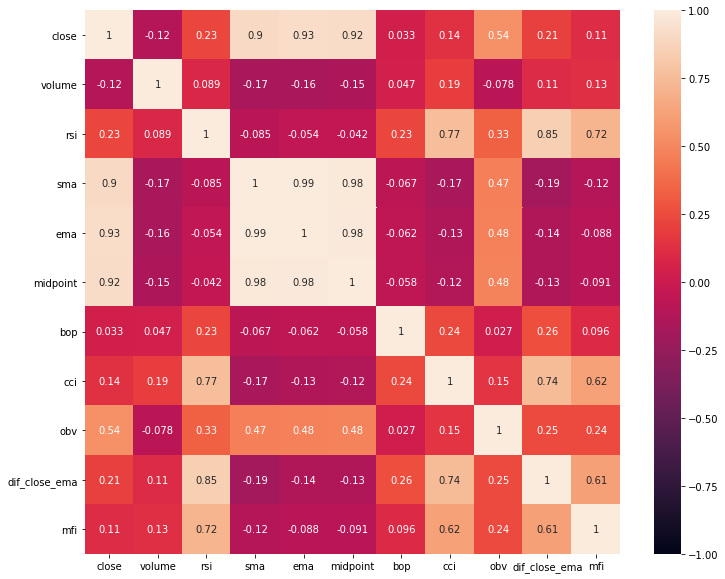

In [ ]:
#let's use the visuals - the heatmap to see the correlation
plt.figure(figsize=(12, 10))
sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=True)
plt.show()

In [ ]:
#still see some leftover correlations, let's drop them too
drop_cols = ['ema', 'midpoint', 'rsi', 'sma', 'cci', 'close', 'dif_close_ema']
df_all.drop(drop_cols, axis = 1, inplace=True)
df_all.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,volume,bop,obv,mfi
0,-0.330217,0.557583,1.853502,0.400055
1,-0.569548,-0.972004,1.745600,-0.378124
2,-1.271899,0.104866,1.702781,-1.032563
3,-1.115357,1.305829,1.760106,-1.098624
4,0.434442,1.538294,1.961043,0.078049


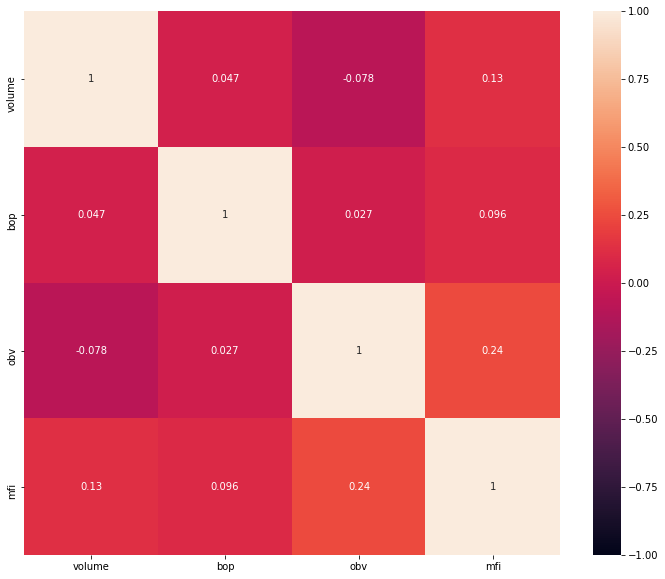

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_all.corr(), vmin=-1, vmax=1, annot=True)
plt.show()
#I want to keep the rsi 

In [ ]:
df_scaled.shape

(197, 14)

In [ ]:
#!pip install yellowbrick

In [ ]:
X = df_all #the features to predict the value

In [ ]:
X

,volume,bop,obv,mfi
0,-0.330217,0.557583,1.853502,0.400055
1,-0.569548,-0.972004,1.745600,-0.378124
2,-1.271899,0.104866,1.702781,-1.032563
3,-1.115357,1.305829,1.760106,-1.098624
4,0.434442,1.538294,1.961043,0.078049
...,...,...,...,...
192,-0.595077,-1.300313,0.887953,1.360296
193,-0.554975,-1.489060,0.822458,1.282313
194,-0.404794,-1.374008,0.725620,0.812742
195,-0.056002,0.445822,0.555993,-0.430062


In [ ]:
#getting the elbow plot to see what might be the right number of clusters

distortions = [] 
inertias = [] 
mapping1 = {} 
mapping2 = {} 
K = range(1,20)

for k in K: #Building and fitting the model kmeanModel = KMeans(n_clusters=k).fit(X) kmeanModel.fit(X)
    kmeanModel = KMeans(n_clusters=k).fit(X) 
    kmeanModel.fit(X)

    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
                  'euclidean'),axis=1)) / X.shape[0]) 
    inertias.append(kmeanModel.inertia_) 

    mapping1[k] = sum(np.min(cdist(X, kmeanModel.cluster_centers_, 
             'euclidean'),axis=1)) / X.shape[0] 
    mapping2[k] = kmeanModel.inertia_

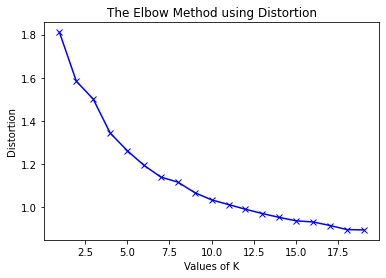

In [ ]:
plt.plot(K, distortions, 'bx-') 
plt.xlabel('Values of K') 
plt.ylabel('Distortion') 
plt.title('The Elbow Method using Distortion') 
plt.show()

#can see the change between 5 and 10

In [ ]:
kmeans = KMeans(n_clusters = 7, random_state=55)
kmeans.fit(X)
y_pred = kmeans.predict(X)
print(y_pred)

[4 1 1 ... 2 0 1]


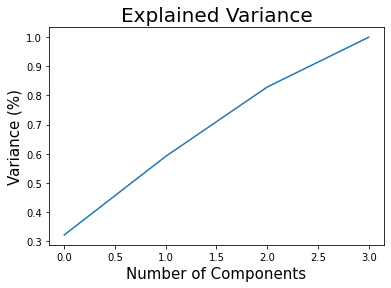

In [ ]:
from sklearn.decomposition import PCA

# pass through the scaled data set into our PCA class object
pca = PCA().fit(X)

# plot the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# define the labels & title
plt.xlabel('Number of Components', fontsize = 15)
plt.ylabel('Variance (%)', fontsize = 15) 
plt.title('Explained Variance', fontsize = 20)

# show the plot
plt.show()


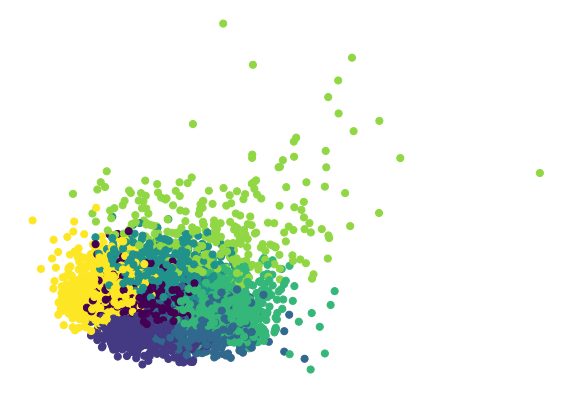

In [ ]:
pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(10,7))
colours = 'rbgymrck'
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred, s=50, cmap='viridis')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
from sklearn import datasets, metrics
print(metrics.silhouette_score(X, y_pred, metric='euclidean')) 
#silhouette score gave the best result at number of clusters = 7, from 2 to 6 performed poorly.

0.2134433360292758


In [ ]:
from sklearn.decomposition import PCA


In [ ]:
pd.Series(kmeans.labels_).value_counts() 


2    1718
4    1581
6    1574
1    1369
0    1335
3    1307
5     325
dtype: int64

In [ ]:
df_all['label'] = kmeans.labels_ #0-4(changable) above clusters #adding a label to a df
df_all['label'] = df_all['label'].astype(str)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
centroids = df_all.groupby(['label']).mean() #grouping by label, shows avg 

In [ ]:
centroids.style.background_gradient() 

,volume,bop,obv,mfi
label,,,,
0,-0.274794,0.978215,-0.075314,-0.954242
1,-0.408235,-0.722897,0.699064,-0.695031
2,-0.162765,-0.849952,0.440876,0.871915
3,0.088682,0.640636,-0.991869,0.505555
4,-0.143539,0.945236,0.813563,0.762228
5,3.774615,0.180592,-0.001625,0.598473
6,0.056945,-0.791917,-1.018578,-0.846814


In [ ]:
for i in range (0, 7):
  label = label_list[i]
  

In [ ]:
df_orig[df_all['label'] == '1']


In [ ]:
import umap
import time

In [ ]:
time_start = time.time()

umap_results = umap.UMAP(n_neighbors=7,
                      min_dist=0.4,
                      metric='euclidean').fit_transform(df_all)

print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 22.479685306549072 seconds


In [ ]:
kmeans = KMeans(n_clusters = 7, random_state=55)
kmeans.fit(umap_results)
y_pred = kmeans.predict(umap_results)
print(y_pred)

[3 0 0 ... 2 4 0]


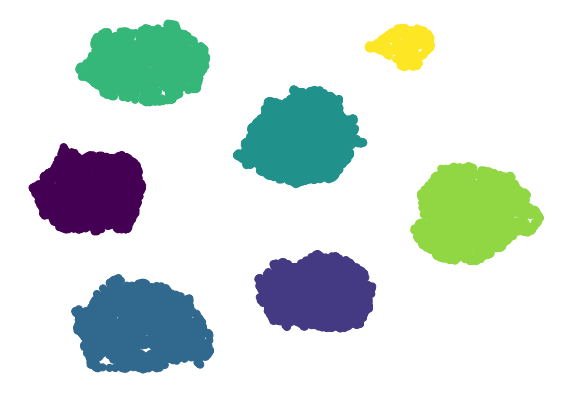

In [ ]:
plt.figure(figsize=(10,7))
colours = 'rbgymrckw'
plt.scatter(umap_results[:, 0], umap_results[:, 1], c=y_pred, s=50, cmap='viridis')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


In [ ]:
from sklearn import datasets, metrics
print(metrics.silhouette_score(X, y_pred, metric='euclidean')) 

0.3985474018543313


In [ ]:
pd.Series(kmeans.labels_).value_counts() 


2    1718
3    1581
5    1574
0    1369
4    1335
1    1307
6     325
dtype: int64

In [ ]:
centroids = df_all.groupby(['label']).mean() #grouping by label, shows avg 

In [ ]:
centroids.style.background_gradient() 

,volume,bop,obv,mfi
label,,,,
0,-0.274794,0.978215,-0.075314,-0.954242
1,-0.408235,-0.722897,0.699064,-0.695031
2,-0.162765,-0.849952,0.440876,0.871915
3,0.088682,0.640636,-0.991869,0.505555
4,-0.143539,0.945236,0.813563,0.762228
5,3.774615,0.180592,-0.001625,0.598473
6,0.056945,-0.791917,-1.018578,-0.846814


We will look at the best cluster with the better metric params for going long(stock price goes up) as opposite to short(when betting that the price will go down). 
MFI - Money flow is calculated by averaging the high, low and closing prices, and multiplying by the daily volume. Comparing that result with the number for the previous day tells traders whether money flow was positive or negative for the current day.

OBV - 

In [ ]:
#take avg of metrics, money flow - is low is better, bop - the higher is better, + in a bullish territory, obv - trend following indicator, should be positive
#mfi money flow index, the lower is better, 
#obv + bop - mfi = metric to see the best cluster. 
#higher it is the higher the chance to go up, take the best cluster. 

#calculate return in a stock df

In [ ]:
#df_orig[df_all['label'] == '3']


In [ ]:
from sklearn.manifold import TSNE

In [ ]:
time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=500)
tsne_results = tsne.fit_transform(df_scaled)

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 197 samples in 0.000s...
[t-SNE] Computed neighbors for 197 samples in 0.006s...
[t-SNE] Computed conditional probabilities for sample 197 / 197
[t-SNE] Mean sigma: 1.610390
[t-SNE] KL divergence after 250 iterations with early exaggeration: 53.157574
[t-SNE] KL divergence after 500 iterations: 0.219972
t-SNE done! Time elapsed: 0.8056094646453857 seconds


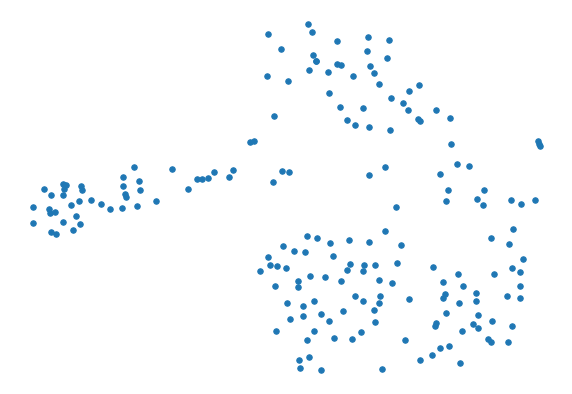

In [ ]:
plt.figure(figsize=(10,7))
colours = 'rbgym'
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], s=30, cmap='viridis')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()
#no clustering yet, just in 2 dimensions

In [ ]:
kmeans = KMeans(n_clusters = 7, random_state=55)
kmeans.fit(tsne_results)
y_pred = kmeans.predict(tsne_results)
print(y_pred)

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0
 0 0 0 0 0 0 0 6 6 0 0 0 0 0 0 0 4 5 5 5 5 6 6 6 6 6 6 6 6 6 6 5 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 5 5 5 5 1 0 1 1 1 1 1 1 1 1 4 4 3 4 4
 4 4 4 3 3 3 3 5 4 5 5 1 4 4 4 4 4 4 4 4 3 3 3 3 3 4 4 5 5 5 5 1 1 1 1 1 1
 1 1 1 1 1 1 4 4 4 4 3 3 3 3 3 3 4 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 1 1
 1 1 1 1 1 1 1 1 1 4 3 3]


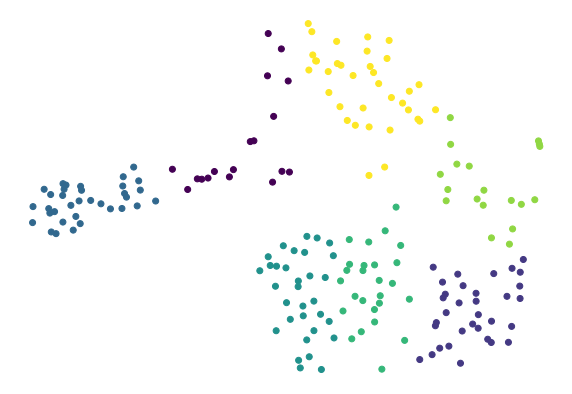

In [ ]:
#tsne = PCA(n_components=2).fit_transform(tsne_results)

plt.figure(figsize=(10,7))
colours = 'rbgymrc' #kp'
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=y_pred, #s=50, 
            cmap='viridis')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()


In [ ]:
pd.Series(kmeans.labels_).value_counts() 


6    35
2    34
1    33
3    32
4    26
5    19
0    18
dtype: int64

In [ ]:
centroids = df_all.groupby(['label']).mean() #grouping by label, shows avg 

In [ ]:
centroids.style.background_gradient() 

,volume,bop,obv,mfi
label,,,,
0,-0.274794,0.978215,-0.075314,-0.954242
1,-0.408235,-0.722897,0.699064,-0.695031
2,-0.162765,-0.849952,0.440876,0.871915
3,0.088682,0.640636,-0.991869,0.505555
4,-0.143539,0.945236,0.813563,0.762228
5,3.774615,0.180592,-0.001625,0.598473
6,0.056945,-0.791917,-1.018578,-0.846814


In [ ]:

from sklearn.cluster import KMeans
from sklearn import metrics

# define a dictionary that contains all of our relevant info.
results_dict = {}

# define how many clusters we want to test up to.
num_of_clusters = 15

# run through each instance of K
for k in range(2, num_of_clusters):
    
    print("-"*100)
    
    # define the next dictionary to hold all the results of this run.
    results_dict[k] = {}

    # create an instance of the model, and fit the training data to it.
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    
    # define the silhouette score
    sil_score = metrics.silhouette_score(X, kmeans.labels_, metric='euclidean')
    
    # store the different metrics
    results_dict[k]['silhouette_score'] = sil_score
    results_dict[k]['inertia'] = kmeans.inertia_
    results_dict[k]['score'] = kmeans.score
    results_dict[k]['model'] = kmeans
    
    # print the results    
    print("Number of Clusters: {}".format(k))
    print('Silhouette Score:', sil_score)

#the more the clusters the worse the result

----------------------------------------------------------------------------------------------------
Number of Clusters: 2
Silhouette Score: 0.3631859991859377
----------------------------------------------------------------------------------------------------
Number of Clusters: 3
Silhouette Score: 0.3746210511410875
----------------------------------------------------------------------------------------------------
Number of Clusters: 4
Silhouette Score: 0.37754873637522685
----------------------------------------------------------------------------------------------------
Number of Clusters: 5
Silhouette Score: 0.39772274196435964
----------------------------------------------------------------------------------------------------
Number of Clusters: 6
Silhouette Score: 0.3916160168491871
----------------------------------------------------------------------------------------------------
Number of Clusters: 7
Silhouette Score: 0.3985474018543313
--------------------------------------

Model Evaluation. The yellowbrick library, we get to access the SilhouetterVisualizer which will help visualize the silhouette score for each point in that particular cluster. What we are looking for is that each cluster exceeds the red line or the average silhouette score and that the clusters are as evenly distributed as possible. The clusters below 0 or above are outliers that are tricky to group.

----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning:

The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.



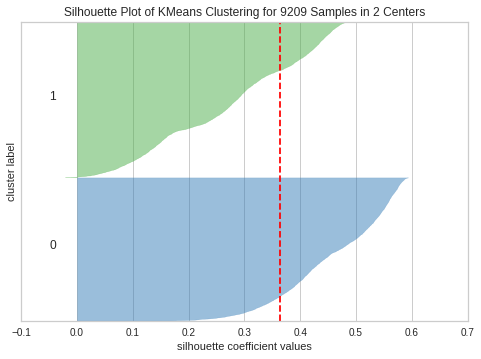

----------------------------------------------------------------------------------------------------


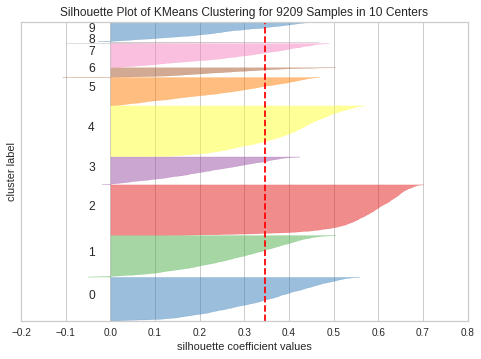

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer

clusters = [2,10]

for cluster in clusters:
    
    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=55)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(X)

    # show the chart
    visualizer.poof()

#looks good with 10

----------------------------------------------------------------------------------------------------


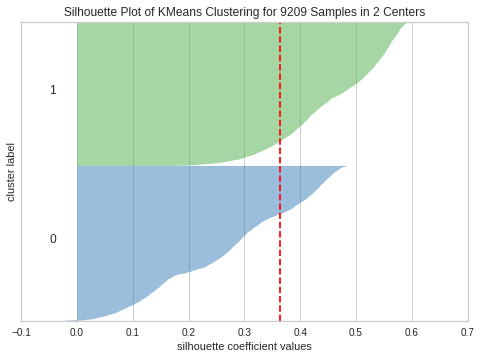

----------------------------------------------------------------------------------------------------


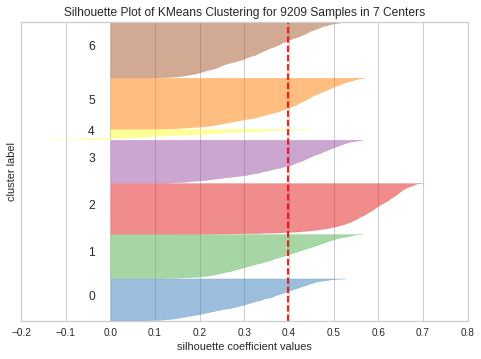

In [ ]:
clusters = [2,7]

for cluster in clusters:

    print('-'*100)

    # define the model for K
    kmeans = KMeans(n_clusters = cluster, random_state=0)

    # pass the model through the visualizer
    visualizer = SilhouetteVisualizer(kmeans)

    # fit the data
    visualizer.fit(X)

    # show the chart
    visualizer.poof()

In [ ]:
for i in range (0, 11):
  cluster = df_cluster[i]
  print(i)
  print(cluster)
  cluster_df = df[cluster]
  cluster_df[]

In [ ]:
ind = df.index.tolist() #bold numbers on the left, count


In [ ]:
df_new = df_orig.loc[ind]


In [ ]:
df_new['y_pred']=y_pred


In [ ]:
df_new[df_new.y_pred == 4].mean()


In [ ]:
for i in range 

In [ ]:
cluster_df = df_all[df_all.label == 2]

In [ ]:
cluster_df.obv.mean()

In [ ]:
cluster_df

In [ ]:
df_all['bop'].mean()

In [ ]:
df_all['mfi'].mean()

In [ ]:
df_all['obv'].mean()

In [ ]:
df_all['volume'].mean()

In [ ]:
df_all.mean

In [ ]:
df_all

In [ ]:
#df_all[df_all.y_pred == 2]


In [ ]:
len(y_pred)

In [ ]:
len(df_orig)

In [ ]:
len(df_all)

In [ ]:
df_orig[y_pred == 2]



In [ ]:
ind = df.index.tolist() #bold numbers on the left, count


In [ ]:
df_new = df_orig.loc[ind]


In [ ]:
df_new['y_pred']=y_pred


In [ ]:
df_new[df_new.y_pred == 2]


In [ ]:
#let's see the other method of clustering: GaussianMixture, all the steps that i did above can be applied here too.

gauss = GaussianMixture(n_components=8, random_state=10)
gauss.fit_predict(X)
y_pred = gauss.predict(X)
print(y_pred)

In [ ]:
pca = PCA(n_components=2).fit_transform(X)

plt.figure(figsize=(10,7))
colours = 'rbgym'
plt.scatter(pca[:, 0], pca[:, 1], c=y_pred, s=50, cmap='viridis')

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
prob_df = pd.DataFrame(gauss.predict_proba(X))
prob_df.shape

In [ ]:
print(metrics.silhouette_score(X, y_pred, metric='euclidean')) 


In [ ]:
df_all['ticker'] = kmeans.labels_ #adding a new column 'label' to the original df


In [ ]:
from ipywidgets import interact


In [ ]:
px.scatter(data_frame=df_all, x='volume', y='mfi', color = 'label', hover_data=['bop', 'obv'])